<a href="https://colab.research.google.com/github/namdori61/tf_practice/blob/main/MLP_classification_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
keras.__version__

'2.4.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train_full.shape)
print(X_train_full.dtype)
print(X_train_full[0])

(60000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1 

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[1].name

'dense'

In [ ]:
weights, biases = model.layers[1].get_weights()

In [ ]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 2ms/step - loss: 1.0185 - accuracy: 0.6724 - val_loss: 0.5286 - val_accuracy: 0.8166
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5098 - accuracy: 0.8221 - val_loss: 0.4839 - val_accuracy: 0.8348
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4539 - accuracy: 0.8417 - val_loss: 0.4359 - val_accuracy: 0.8472
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4215 - accuracy: 0.8531 - val_loss: 0.4170 - val_accuracy: 0.8540
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3980 - accuracy: 0.8622 - val_loss: 0.3966 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3858 - accuracy: 0.8649 - val_loss: 0.3753 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8684 - val_loss: 0.3602 - val_accuracy:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

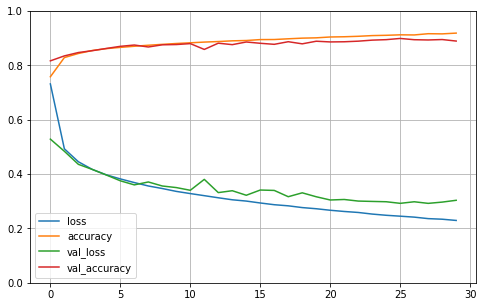

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8817


[0.33472928404808044, 0.8816999793052673]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])